# Projet optimisation de la trajectoire d'un robot

# Partie 1

### Question 1

Les inconnues du problème sont les poses $Pi$ de la trajectoire. On pose $P_{i}=(x_{i},y_{i},\theta_{i})$ avec $x_i,y_i,\theta_i$ définis pour $i$ allant de $0$ à $n$ par rapport à un repère fixe ayant pour origine $P_0 = (0,0,0)$.

On cherche à les déterminer grâce aux relations d'odométrie et de fermeture de boucles qui elles sont connues.


### Question 2

Chaque relation d'odométrie est donnée relativement à la pose précédente. 
On a donc les relations suivantes pour l'odométrie : 

$$
\left\{
    \begin{array}{ll}
        x_{i+1} = x_i + dx_i\cos{\theta_i}- dy_i\sin{}\theta_i = f_{x}(x_{i},dx_{i},dy_{i},\theta_{i})\\
        y_{i+1} = y_i + dx_i\sin{\theta_i}+ dy_i\cos{}\theta_i = f_{y}(y_{i},dx_{i},dy_{i},\theta_{i})\\
        \theta_{i+1} = \theta_i + d\theta_i = f_{\theta}(\theta_{i},d\theta_{i})
    \end{array}
\right.
$$

Et on adapte pour les relations de fermetures de boucle en remplaçant $i+1$ par $j$ avec $j$ l'indice de la fermeture de boucle. 

### Question 3

On veut ici déterminer quelle fonction minimiser afin de vérifier au mieux les données d'odométrie et de fermetures de boucles. On va d'abord introduire plusieurs notations.

On va travailler ici avec des fonctions $f_{x}, f_{y} et f_{\theta}$ définies respectivement par les relations données en question 2 s'appliquant sur les variables $x_{i}, y_{i}$ et $\theta_{i}$. De plus, les éléments que nous appelerons $dx_{i},dy_{i}$ et $d\theta_{i}$ ainsi que $dx'_{i},dy'_{i}$ et $d\theta'_{i}$ dans la suite correspondent respectivement aux valeurs d'odométrie et de fermeture de boucles mesurées par le robot lors de son parcours, et sont donc connues et fixées.

Ce faisant, on note $P_{i}=(x_{i},y_{i},\theta_{i})$ un triplet de $R^{3}$ et M le vecteur de dimension 3n définit par $M=(P_{i})_{1 \leqslant i \leqslant n}$. 

Si M est un minimum de notre fonction, on veut que chacun des $p_{i}$ vérifie au mieux les relations d'odométrie et de fermetures de boucles, c'est-à-dire:

1) $\forall i \in {1,...,n}$,
$x_{i+1}\approx f_{x}(x_{i},dx_{i},dy_{i},\theta_{i})$,
$y_{i+1}\approx f_{y}(y_{i},dx_{i},dy_{i},\theta_{i})$,
$\theta_{i+1}\approx f_{\theta}(\theta_{i},d\theta_{i})$.

2) Si l'on note B l'ensemble des couples (j,i) correspondant à des fermetures de boucles détectées par le robot, on veut également vérifier: $x_{j}\approx f_{x}(x_{i},dx'_{i},dy'_{i},\theta_{i})$, 
$y_{j}\approx f_{y}(y_{i},dx'_{i},dy'_{i},\theta_{i})$ et
$\theta_{j}\approx f_{\theta}(\theta_{i},d\theta'_{i})$.

Plus concrètement, ces approximations se traduisent par le fait que les quantités $\left|x_{i+1}- f_{x}(x_{i},dx_{i},dy_{i},\theta_{i}) \right|^{2}$ soient le plus petites possibles, de même en remplaçant les $x$ par les $y$ et les $\theta$, et de même pour les relations de fermeture de boucle.

Comme on veut que cela soit vrai pour toutes ces relations, et que celles-ci sont interdépendantes, cela revient à minimiser la fonction de $R^{3n}$ suivante:

 $M \in R^{3n} \rightarrow \sum_{i=1}^{n} \left\|P_{i+1} - F(P_{i},dx_{i},dy_{i},d\theta_{i}) \right\|^{2} + \sum_{(j,i) \in B} \left\|P_{j} - F(P_{i},dx'_{i},dy'_{i},d\theta'_{i}) \right\|^{2}$ 

où les $P_{i}$ ont été définis ci-dessus comme les triplets composants de M et où $F(P_{i},dx_{i},dy_{i},d\theta_{i})=(f_{x}(x_{i},dx_{i},dy_{i},\theta_{i}),f_{y}(y_{i},dx_{i},dy_{i},\theta_{i}),f_{\theta}(\theta_{i},d\theta_{i}))$. 

# Partie 2

In [2]:
import time
import matplotlib.pyplot as plt
import autograd.numpy as np
import autograd
import copy
import scipy.optimize
from math import cos, sin, pi, sqrt

### Question 1

In [11]:
donnees_odo = []
donnees_loop = []

def recup_donnees(fichier):
    with open(fichier, 'r') as intel:
        for ligne in intel:
            l = ligne.split()
            for i in range(1,len(l)):
                l[i]=float(l[i])
            if l[0]=="EDGE_ODO":
                donnees_odo.append(l[1:3]+[l[3:]])
            else:
                donnees_loop.append(l[1:3]+[l[3:]])
                
recup_donnees("INTEL.txt")
np.array(donnees_loop)


array([[array(19.), array(166.),
        array([-2.459689,  0.241111,  0.2528  ])],
       [array(19.), array(172.), array([1.067903, 0.915786, 0.14947 ])],
       [array(25.), array(172.),
        array([-2.539634,  0.85263 , -0.02986 ])],
       [array(25.), array(178.),
        array([ 1.225223,  0.672079, -0.10248 ])],
       [array(32.), array(178.),
        array([-2.020007, -0.239771,  0.71518 ])],
       [array(32.), array(183.),
        array([-0.092559,  0.424181,  0.0416  ])],
       [array(44.), array(189.),
        array([-2.265706, -0.570857,  0.19772 ])],
       [array(44.), array(195.),
        array([ 1.302289, -0.133004, -0.00528 ])],
       [array(50.), array(195.),
        array([-2.374379, -0.253682,  0.21612 ])],
       [array(50.), array(201.),
        array([ 1.291572,  0.086248, -0.0507  ])],
       [array(50.), array(203.),
        array([ 2.550695,  0.035722, -0.08465 ])],
       [array(61.), array(203.),
        array([-2.852494,  0.122053,  0.07787 ])],
   

### Question 2

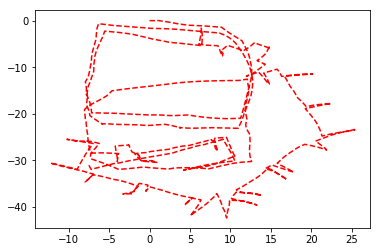

In [12]:
def estim_trajectoire(odometrie):
    liste_x = [0]
    liste_y = [0]
    liste_theta = [0]
    for i in range(len(odometrie)):
        p_i = np.array([liste_x[-1], liste_y[-1], liste_theta[-1]])
        di = np.array(odometrie[i][2])
        rot = np.array([[cos(p_i[2]), -sin(p_i[2]), 0], [sin(p_i[2]),cos(p_i[2]), 0], [0, 0, 1]])
        p_i = p_i + np.dot(rot, di)
        liste_x.append(p_i[0])
        liste_y.append(p_i[1])
        liste_theta.append(p_i[2])
    return liste_x, liste_y, liste_theta

x, y, t = estim_trajectoire(donnees_odo)
plt.figure()
plt.plot(x, y, 'r--')
plt.show()
        


La trajectoire semble un peu paradoxale avec la forme du laboratoire, il semble que le robot se déplace même sur les zones infranchissables. D'où une optimisation nécéssaire avec les fermetures de boucle.

### Question 3

#### Convexité de la fonction

Interessons nous d'abord à la convexité de la fonction. Comme celle-ci contient des cosinus et sinus en fonction des variables $\theta$ de chaque pose, on sent que la fonction ne sera pas convexe. Un moyen de vérifier qu'elle ne l'est pas est de faire varier simplement le $\theta$ d'une seule pose et de tracer l'allure de la courbe que l'on obtient.

609595.6753715187


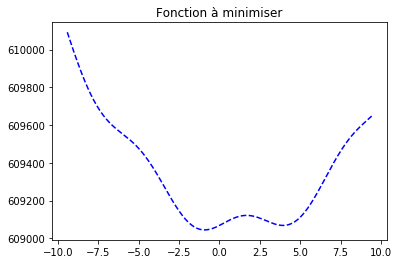

In [13]:
#Definition de la fonction à minimiser f_minim en trois étapes

def F(p_i,di):
    rot = np.array([[np.cos(p_i[2]), -np.sin(p_i[2]), 0], [np.sin(p_i[2]),np.cos(p_i[2]), 0], [0, 0, 1]])
    p_i = p_i + np.dot(rot, np.array(di))
    return p_i
    
def norme_carree(X):
    return sum(X[i]**2 for i in range(len(X)))
    
def f_minim_pose(P,i):
    """C'est la fonction qui calcule les termes de la somme où intervient uniquement la pose Pi"""
    
    #Partie odométrie
    p_i=np.array(P[i])
    pi_1=np.array(P[i+1])
    relations_odo=[]
    if i<len(donnees_odo):
        relations_odo = donnees_odo[i]
    diff_o=pi_1-F(p_i,np.array(relations_odo[2]))
    a=norme_carree(diff_o)

    #Partie loop
    relations_loop = [relation for relation in donnees_loop if relation[0]==i] #Pas les relations où i est le deuxième indice pour ne pas compter les relations 2 fois
    indexes_loop = [int(relation[1]) for relation in relations_loop]
    Pj=[np.array(P[j]) for j in indexes_loop] #Les poses qui ont des relations de fermeture de boucle avec la pose Pi
    for k in range(len(relations_loop)):
        diff=Pj[k]-F(p_i,np.array(relations_loop[k][2]))
        a+=norme_carree(diff)
    return a

def f_minim(P):
    P=np.array([[P[3*i],P[3*i+1],P[3*i+2]] for i in range(int(len(P)/3))]) #On passe le vectur en version matricielle [[x1,y1,theta1],...,[xn,yn,thetan]] pour utiliser la fonction précédente
    return sum([f_minim_pose(P,i) for i in range(len(donnees_odo))])


#Vecteur de R^3n correspondant à l'estimation précédente
P=[]
for i in range(len(x)):
    P.append(x[i])
    P.append(y[i])
    P.append(t[i])
P=np.array(P)
    
#Variation de theta de la pose k
k=19
print(f_minim(P))

liste_theta=np.linspace(-3*pi,3*pi,300)
liste_f=[]
for i in range(300):
    P[3*k+2]=liste_theta[i]
    liste_f.append(f_minim(P))
    
plt.figure()
plt.plot(liste_theta, liste_f, 'b--')
plt.title("Fonction à minimiser")


plt.show()

On voit donc que la fonction n'est pas convexe. 

#### Existence et unicité de la solution

De plus, sur cet exemple, on a un minimum atteint pour deux valeurs de $\theta$ différentes, ce qui peut supposer qu'il soit possible d'obtenir le même résultat pour un vecteur P qui minimise la fonction. Si ce n'est pas le cas pour tout jeu de données d'entrée (s'il n'y a que des relations d'odométrie, il y'a unicité de la solution par exemple), on peut trouver des jeux de données qui ont plusieurs solutions. Pour plus de détails, des démonstrations moins qualitatives sont en pièce jointe.

L'existence de la solution se justifie par le caractère fermé borné de l'espace dans lequel on cherche nos solutions, qui n'est pas $R^{3n}$ tout entier mais restreint par les dimensions du laboratoire selon x et y. Pour les theta, l'espace dans lequel on les cherche est au plus [0,2n$\pi]^{n}$ car tous les d$\theta$ appartiennent à [0,2$\pi$].

#### Conditionnement

Calculons désormais le conditionnement du problème, c'est-à-dire la sensibilité relative de la fonction f par rapport à une légère variation spatiale du point en laquelle on l'évalue. On va donc calculer $\frac{\|f(x)-f(x+\delta)\|}{\|f(x)_\| \epsilon}$


In [14]:
epsilon=10**(-16)
m=10
n=3*(len(donnees_odo)+1)

def conditionnement(f,liste,epsilon,deplacement):
    l=[]
    for x in liste:
        k=abs((f(np.array(x)+np.array(deplacement))-f(x))/f(x))*1/epsilon
        l.append(k)
    return l

def normalise(x):
    norm=np.linalg.norm(np.array(x))
    n=len(x)
    for i in range(n):
        x[i]=x[i]/norm
    return x

from random import uniform

#on crée des vecteurs de façon aléatoire de norme variant de 1 à 100 afin de déterminer la valeur de k et se cantonner à un espace borné, comme le laboratoire
liste=[normalise([uniform(-i,i) for k in range(n)]) for i in range (1,100)]
p=len(liste)
for i in range(p):
    for j in range(n):
        liste[i][j]=liste[i][j]*(i+1)


#print([[f_minim(vecteur+deplacement),f_minim(vecteur)] for vecteur in liste])


deplacement=[uniform(-1,1)*epsilon for k in range(n)] #on crée un déplacement de façon aléatoire et plus petit que $\espilon$ en valeur absolue pour chaque composante


l=conditionnement(f_minim,liste,epsilon,deplacement)
print(l)

k=sum(l)/len(l)
print("Moyenne:", k)

[2.0119190102185405, 0.0, 0.0, 1.9966378403297071, 0.0, 0.0, 0.0, 0.0, 1.8702207601717324, 0.0, 0.0, 0.0, 0.0, 1.657759809642381, 0.0, 1.5835813614189598, 1.5688346236583592, 4.442632025114782, 1.4325350484385204, 0.0, 1.399857531357225, 1.316290950031806, 0.0, 0.0, 0.0, 2.386833313563582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6943984411695256, 0.0, 0.0, 1.5385222807062888, 0.0, 0.0, 1.3781132872449509, 0.0, 0.0, 0.0, 0.0, 1.1709812635041414, 0.0, 0.0, 1.1159147551068984, 0.0, 0.0, 1.973696920520922, 1.9728534180682884, 0.0, 0.0, 0.0, 0.0, 1.6908191184761694, 0.0, 0.0, 1.5349656506888554, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.269450900717182, 0.0, 0.0, 0.0, 0.0, 1.132653804233046, 0.0, 0.0, 2.062644037670465, 0.0, 2.119705063481474, 0.0, 0.0, 1.8785742016746156, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Moyenne: 0.44646864057786284


Même si la valeur de k est relativement faible (moyenne inférieure à 1) elle reste très grande devant epsilon ce qui indique un mauvais conditionnement du problème.

Cependant, bien que l'on ne prenne pas en compte les données de fermeture de boucle, on peut considérer que le vecteur calculé en question 2 de cette deuxième partie est une première approximation (bien que grossière) du vecteur solution. Ainsi, il n'est pas trop éloigné spatialement du vecteur x* solution.
Comme il s'agit d'un problème d'optimisation non-convexe, lorsque l'on a atteint un minimum local (gradient nul), on ne peut savoir qu'il est global uniquement si l'on a testé toutes les autres valeurs, ce qui est très coûteux.
Mais, si l'on sait qu'une racine n'est pas trop éloignée spatialement du minimum global, on peut en utilisant des méthodes d'optimisation pour des fonctions convexes, espérer converger vers ce minimum global.
C'est ce choix que nous avons fait pour la question suivante.

### Question 4

Même si la fonction n'est pas convexe, les oscillations très légères comparées au caractère quadratique de la fonction nous permettent de penser qu'une méthode de descente de gradient à pas variable avec conditions de Wolfe nous mènera au minimum global. On part de l'estimation avec les relations d'odométrie seulement.

In [16]:
#On définit le gradient
def grad_f_minim(p) : 
    gradf = autograd.grad(f_minim)
    gradient = gradf(p)
    return gradient

M=np.array([uniform(-100,100) for k in range(n)])
print(P)
print(grad_f_minim(P))
print(np.sqrt(norme_carree(grad_f_minim(P))))

# Conditions de Wolfe
def wolfe_step(fun, grad_fun, xk, pk, c1 = 0.25, c2 = 0.75, M = 1000):
    l_moins = 0
    l_plus = 0
    f_xk = fun(xk)
    grad_f_xk = grad_fun(xk)
    li = 1 #- 2*0.1*abs(f_x) / np.dot(grad_f_x,d)
    i = 0
    while(i < M):
        if (fun(xk+li*pk)>(f_xk+c1*li*np.dot(grad_f_xk,pk))):
            l_plus = li
            li = (l_moins+l_plus)/2.0
        else:
            if (np.dot(grad_fun(xk+li*pk),pk) < c2*np.dot(grad_f_xk,pk)):
                l_moins = li
                if (l_plus == 0):
                    li = 2*li
                else:
                    li = (l_moins+l_plus)/2.0
            else:
                return li
        i = i + 1
    return li

def optim_BFGS(fun, grad_fun, x0, max_iter = 30, epsilon_grad_fun = 1e-8):
    k = 0
    xk = x0
    grad_f_xk = grad_fun(xk)
    Hk = np.identity(len(x0))
    while ((k<max_iter) and (np.linalg.norm(grad_f_xk)>epsilon_grad_fun)):
        pk = -np.matmul(Hk,grad_f_xk)
        lk = wolfe_step(fun, grad_fun, xk, pk)
        xk1 = xk + lk*pk
        grad_f_xk1 = grad_fun(xk1)
        print(np.linalg.norm(grad_f_xk1))
        sk = xk1 - xk
        yk = grad_f_xk1 - grad_f_xk
        gammak = 1.0/np.dot(yk, sk)
        Ak = np.identity(len(x0)) - gammak*np.multiply(sk[:, np.newaxis], yk)
        Bk = np.identity(len(x0)) - gammak*np.multiply(yk[:, np.newaxis], sk)
        Hk = np.matmul(np.matmul(Ak, Hk), Bk) + gammak*np.multiply(sk[:, np.newaxis], sk)
        xk = xk1
        grad_f_xk = grad_f_xk1
        k = k + 1
    print("Nombre d'iterations : ", k)
    return xk

#BFGS
print("BFGS...")
start_time = time.time()
res = optim_BFGS(f_minim, grad_f_minim, P)
print("Durée : ", time.time()-start_time)
print()

[  0.           0.           0.         ...  -7.61606458 -30.64994328
  83.53317   ]
[0. 0. 0. ... 0. 0. 0.]
4791.772660825386
BFGS...
1593.1784352161767
1301.3636439074414
1004.7149042193962
1076.9953518742705
796.5848115828196
731.8701565640122
717.5648985841951
660.7667109398412
584.5896212250773
654.4565285563131
685.357781876745
617.6400840549311
508.34672850784597
458.6103045874558
488.0328151219849
452.60270335169264
394.64123091209336
375.1268830217532
397.180372129253
309.66830359425995
310.63103483660564
283.5528414060509
214.95567279206787
202.01370942180873
177.20747833787613
292.66581679926486
259.5353694114062
201.51280380655498
214.26492340852275
189.55404772559697
Nombre d'iterations :  30
Durée :  403.4367697238922



In [ ]:
print(np.linalg.norm(grad_f_minim(res)))
# Méthode de descente de gradient avec recherche linéaire suivant les conditions de Wolfe
def optim_gradient_wolfe_step(fun, grad_fun, x0, max_iter = 100000, epsilon_grad_fun = 1e-8):
    k = 0
    xk = x0
    grad_f_xk = grad_fun(xk)
    while ((k<max_iter) and (np.linalg.norm(grad_f_xk)>epsilon_grad_fun)):
        pk = -grad_f_xk
        lk = wolfe_step(fun, grad_fun, xk, pk)
        xk = xk + lk*pk
        grad_f_xk = grad_fun(xk)
        print(np.linalg.norm(grad_f_xk))
        k = k + 1
    print("Nombre d'iterations : ", k)
    return xk

#Gradient à pas variable avec conditions de Wolfe
print("Gradient à pas variable avec conditions de Wolfe...")
start_time = time.time()
res2 = optim_gradient_wolfe_step(f_minim, grad_f_minim, res)
print("Durée : ", time.time()-start_time)
print()

La convergence de l'algorithme de BFGS n'aboutissant pas (des itérations très longues qui oscillaient autour d'une norme de gradient de 100 pendant un long moment), nous avons limité son utilisation à 30 itérations et nous avons tenté de continuer en descente de gradient. Néanmoins, la convergence trop longue nous empêche de pouvoir observer le résultat et donc de commenter la courbe optimisée et une oscillation autour d'une norme de 10 est aussi observable.

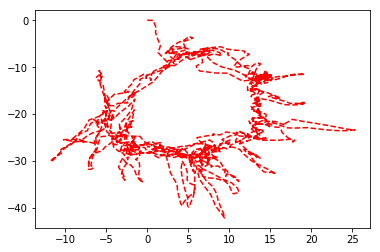

In [17]:
x, y, t = [res[3*k] for k in range(int(len(res)/3))], [res[3*k+1] for k in range(int(len(res)/3))], [res[3*k+2] for k in range(int(len(res)/3))]
plt.figure()
plt.plot(x, y, 'r--')
plt.show()

On peut néanmoins reconnaître une forme plus cohérente de la trajectoire du robot que celle observée avec les données d'odométrie uniquement. 

## Partie 3

### Question 1

On a compris que le problème ici réside dans la non convexité de la fonction f selon les variables $\theta_{i}$, ce que l'on va chercher à corriger. Géométriquement, modifier le produit scalaire en considérent une matrice symétrique définie positive, revient à transformer l'espace en accordant plus ou moins d'importance à l'une ou l'autre des dimensions. On va donc chercher à modifier les dimensions de telle sorte que f deviennent convexe.

L'objectif ici est de modifier le produit scalaire afin de convexifier la fonction f. A x et y fixé, on a vu précédemment que la fonction f n'est pas convexe suivant les $\theta_{i}$. Cela se traduit par le fait que dans la hessienne de f, les $\frac{\partial^2 f}{\partial \alpha_{j} \partial \theta_{i} }$ où $\alpha_{j}$ peut être x,y ou $\theta$ peuvent être négatives. C'est donc ces facteurs sur lequel on va chercher à agir afin de les rendre le "moins négatif possible" pour convexifier le plus possible la fonction f.

On va donc utiliser une nouvelle norme, à partir d'un nouveau produit scalaire définit à l'aide d'une matrice symétrique définie positive diagonale notée A. Si l'on note $(\lambda_{i})_{1\leqslant i \leqslant 3n}$ ses coefficients diagonaux, on va retrouver les termes des normes au carré dans le calcul de f multipliés par ces $\lambda_{i}$. Comme ceux-ci sont des constantes, on va également les retrouver dans l'expression du gradient et de la hessienne de f. Cependant, comme le produit scalaire a changé, on va pourvoir écrire pour h très petit que $ \nabla f(x+h) = \nabla f(x) + \nabla^{2} f(x)^{T}Ah  = \nabla f(x) + (A\nabla^{2} f(x))^{T}h $. Alors, on remarque que les colonnes de $\nabla^{2} f(x)$ sont multipliées par les coefficients de A. Ainsi, les $(\lambda_{i})$ sont "élevés au carré" dans la partie hessienne de cette égalité alors qu'ils ne sont qu'à la puissance 1 pour le gradient. Ainsi, choisir des $(\lambda_{3i})_{1\leqslant i \leqslant n}$ très petits en conservant les autres égaux à 1 permet de diminuer fortement la valeur absolue des termes $\frac{\partial^2 f}{\partial \alpha_{j} \partial \theta_{i} }$ pouvant être négatif et les rapprocher de 0. On va ainsi convexifier notre fonction f.

### Question 2

On commence par estimer la trajectoire à partir de l'odométrie comme précédemment

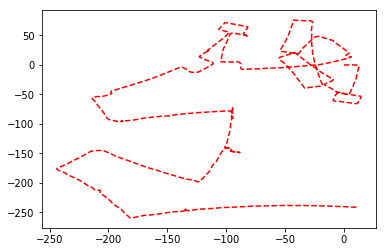

In [18]:
donnees_odo = []
donnees_loop = []         
recup_donnees("MIT.txt")
x, y, t = estim_trajectoire(donnees_odo)
plt.figure()
plt.plot(x, y, 'r--')
plt.show()

P=[]
for i in range(len(x)):
    P.append(x[i])
    P.append(y[i])
    P.append(t[i])
P=np.array(P)

On définit donc la matrice A de telle sorte que le coefficient attribué à la différence d'angles au carrée soit la plus faible pour négliger l'influence de theta. A est diagonale de taille 3 et possède un coefficient $\lambda$ arbitrairement faible. On redéfinit ainsi la fonction norme au carrée pour l'associer à A.

In [1]:
A = np.diag([1,1,0.1])
def norme_carree(X):
    return np.dot(X,np.dot(A,X))

NameError: name 'np' is not defined

On essaie donc avec le nouveau produit scalaire sur les autres données. Comme seule la fonction norme a été modifiée précédemment, on peut réutiliser le code de la partie 2 pour essayer d'optimiser la trajectoire:

In [25]:
res3 = optim_BFGS(f_minim, grad_f_minim, P, 20, 200)

954.8642838813398
1044.2466371198084
945.4371857726871
878.3764463328121
823.0535670185568
791.9608626978437
681.3853802987501
658.6868112733317
617.3515294649928
567.413064671018
576.1606083361469
584.100859900599
610.5381283651026
556.2694977161091
440.7524852846615
490.7414797623384
479.8214480301344
479.6134723827081
633.3313536730955
412.599637786251
Nombre d'iterations :  20


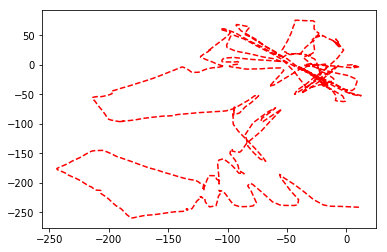

In [26]:
x, y, t = [res3[3*k] for k in range(int(len(res3)/3))], [res3[3*k+1] for k in range(int(len(res3)/3))], [res3[3*k+2] for k in range(int(len(res3)/3))]
plt.figure()
plt.plot(x, y, 'r--')
plt.show()

On reconnait à nouveau la forme du laboratoire, avec moins de fouillis sauf en haut à droite. Il faudrait probablement augmenter le poids des relations de boucle pour obtenir un résultat plus rapidement. Néanmoins on remarque que les pics sur la branche du bas doivent correspondre à des relations de boucle tout le long couloir. Les dx et dy sont énormément étirés pour tenter de pallier à la fermeture de boucle. On veut peut-être alors diminuer le poids des relations de boucle pour obliger les angles à diminuer. Nous n'avons pas eu le temps de faire les tests.

### Annexe

On a en outre tenté de calculer le gradient de notre fonction à minimiser à la main pour l'utiliser dans nos algorithmes d'optimisation. Le problème était que cette version était beaucoup trop lente. Le code est le suivant:

In [ ]:
def loop_from(i):
    """
    trouve toutes les boucles qui partent de i
    """
    res = []
    for loop in donnees_loop:
        if loop[0]==i:
            res.append(loop)
    return res

def loop_to(i):
    """
    trouve toutes les boucles qui arrivent en i
    """
    res = []
    for loop in donnees_loop:
        if loop[1]==i:
            res.append(loop)
    return res

def grad_partiel(x_i,y_i,theta_i,x_i_prec,y_i_prec,theta_i_prec,dx_i_prec,dy_i_prec,dtheta_i_prec):
    grad_x = 2*x_i*(x_i - cos(theta_i_prec)*dx_i_prec + sin(theta_i_prec)*dy_i_prec - x_i_prec)
    grad_y = 2*y_i*(y_i - sin(theta_i_prec)*dx_i_prec - cos(theta_i_prec)*dx_i_prec - y_i_prec)
    grad_theta = 2*theta_i*(theta_i - dtheta_i_prec - theta_i_prec)
    return grad_x,grad_y,grad_theta
    

def grad_f_minim(P):
    odo = donnees_odo
    loop = donnees_loop
    n = len(P)//3
    grad = [0,0,0]   #Le gradient au premier point est toujours nul car on a pris (x,y,theta)_0 = (0,0,0)
    for i in range(1,n):
        grad_x = 0
        grad_y = 0
        grad_theta = 0
        #On commence par ajouter la partie liée à l'odométrie
        x_i = P[3*i]
        y_i = P[3*i+1]
        theta_i = P[3*i+2]
        x_i_prec = P[3*(i-1)]
        y_i_prec = P[3*(i-1)+1]
        theta_i_prec = P[3*(i-1)+2]
        dx_i_prec = odo[i-1][2][0]
        dy_i_prec = odo[i-1][2][1]
        dtheta_i_prec = odo[i-1][2][2]
        g_x,g_y,g_theta = grad_partiel(x_i,y_i,theta_i,x_i_prec,y_i_prec,theta_i_prec,dx_i_prec,dy_i_prec,dtheta_i_prec)
        grad_x += g_x
        grad_y += g_y
        grad_theta += g_theta
        if i<n-2:
            x_i_suiv = P[3*(i+1)]
            y_i_suiv = P[3*(i+1)+1]
            theta_i_suiv = P[3*(i+1)+2]
            dx_i = odo[i][2][0]
            dy_i = odo[i][2][1]
            dtheta_i = odo[i][2][2]
            dx_i_suiv = odo[i+1][2][0]
            dy_i_suiv = odo[i+1][2][1]
            dtheta_i_suiv = odo[i+1][2][2]
            g_x,g_y,g_theta = grad_partiel(x_i_suiv,y_i_suiv,theta_i_suiv,x_i,y_i,theta_i,dx_i,dy_i,dtheta_i)
            grad_x -= g_x
            grad_y -= g_y
            grad_theta -= g_theta
            grad_theta += 2*(-sin(theta_i)*dx_i-cos(theta_i)*dy_i)*(x_i_suiv - cos(theta_i)*dx_i + sin(theta_i)*dy_i - x_i)
            grad_theta += 2*(cos(theta_i)*dx_i-sin(theta_i)*dy_i)*(y_i_suiv - sin(theta_i)*dx_i - cos(theta_i)*dx_i - y_i)
        #On ajoute ensuite la partie liée aux boucles
        l_f = loop_from(i)
        for k in l_f:
            x_k = P[3*int(k[1])]
            y_k = P[3*int(k[1])+1]
            theta_k = P[3*int(k[1])+2]
            dx_k = k[2][0]
            dy_k = k[2][1]
            dtheta_k = k[2][2]
            g_x,g_y,g_theta = grad_partiel(x_k,y_k,theta_k,x_i,y_i,theta_i,dx_k,dy_k,dtheta_k)
            grad_x -= g_x
            grad_y -= g_y
            grad_theta -= g_theta
            grad_theta += 2*(-sin(theta_i)*dx_k-cos(theta_i)*dy_k)*(x_k - cos(theta_i)*dx_k + sin(theta_i)*dy_k - x_i)
            grad_theta += 2*(cos(theta_i)*dx_k-sin(theta_i)*dy_k)*(y_k - sin(theta_i)*dx_k - cos(theta_i)*dx_k - y_i)
        l_t = loop_to(i)
        for k in l_f:
            x_k = P[3*int(k[0])]
            y_k = P[3*int(k[0])+1]
            theta_k = P[3*int(k[0])+2]
            dx_k = k[2][0]
            dy_k = k[2][1]
            dtheta_k = k[2][2]
            g_x,g_y,g_theta = grad_partiel(x_i,y_i,theta_i,x_k,y_k,theta_k,dx_k,dy_k,dtheta_k)
            grad_x += g_x
            grad_y += g_y
            grad_theta += g_theta
        grad.append(grad_x)
        grad.append(grad_y)
        grad.append(grad_theta)
    return np.array(grad)


Narjis El Amraoui, Timothé Blondel, Alexis Roux